In [19]:
!pip install kneed

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from kneed.knee_locator import KneeLocator

import warnings
warnings.filterwarnings("ignore")

In [9]:
df = sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [10]:
df.shape

(150, 5)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [23]:
df["species"].nunique()

3

In [24]:
df["species"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [25]:
rename = {"setosa":0,"versicolor":1,"virginica":2}
df["species"] = df["species"].replace(rename)

In [26]:
x = df.iloc[:,:4]
y = df["species"]

In [27]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,random_state=10)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

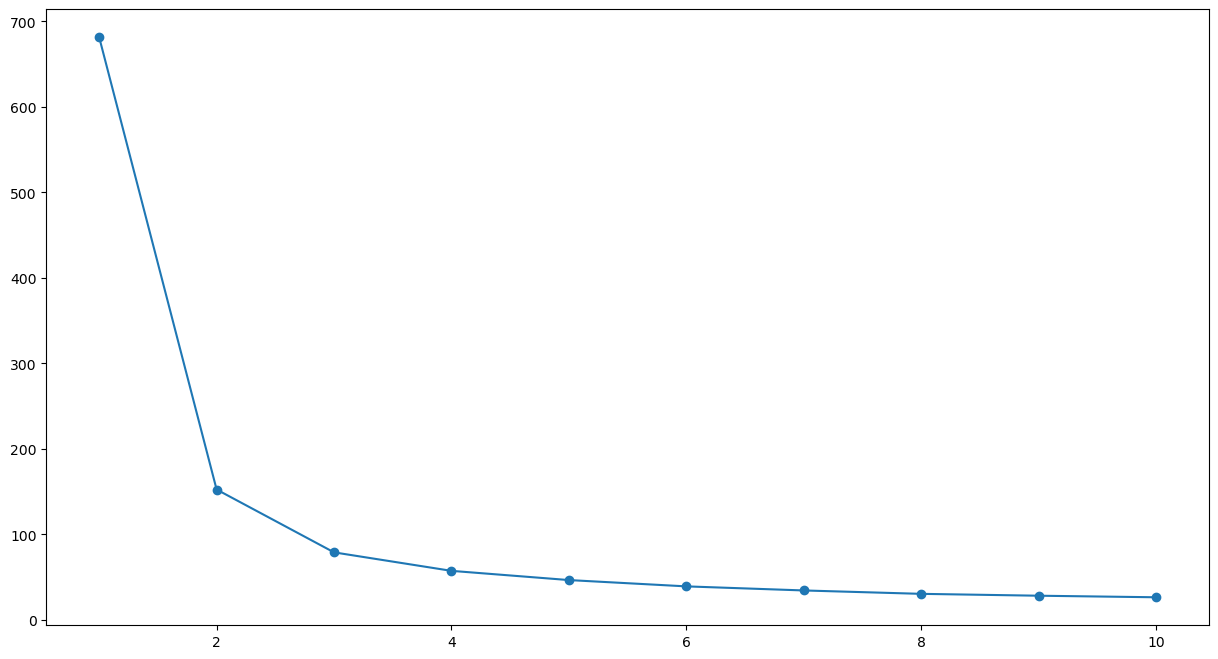

In [28]:
plt.figure(figsize=(15,8))
plt.plot(range(1,11),wcss,marker="o")
plt.show()

In [29]:
k = KneeLocator(x=range(1,11),y=wcss,curve="convex",direction="decreasing")
k.elbow

3

In [31]:
kmeans = KMeans(n_clusters=3,random_state=10)
ypred = kmeans.fit_predict(x)

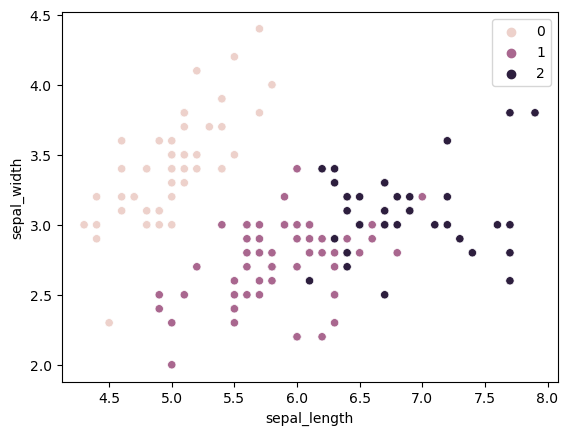

In [36]:
sns.scatterplot(x=x.iloc[:,0],y=x.iloc[:,1],hue=ypred)
plt.show()